# Feature Extraction using scikit-learn 

In [1]:
# Data Generation (3-dimensional)
import numpy as np
from scipy.linalg import sqrtm
%matplotlib inline

# generate training data
N = 100
m1 = np.mat([0, 0, 0]); s1 = np.mat([[9, 0, 0], [0, 1, 0], [0, 0, 1]])    # Class 1
m2 = np.mat([4, 4, 0]); s2 = np.mat([[9, 0, 0], [0, 1, 0], [0, 0, 1]])    # Class 2
m3 = np.mat([2, 2, 4]); s3 = np.mat([[9, 0, 0], [0, 1, 0], [0, 0, 1]])    # Class 3
X1 = np.matmul(np.random.randn(N, 3), sqrtm(s1)) + np.tile(m1, (N, 1))    # Class 1
X2 = np.matmul(np.random.randn(N, 3), sqrtm(s2)) + np.tile(m2, (N, 1))    # Class 2
X3 = np.matmul(np.random.randn(N, 3), sqrtm(s3)) + np.tile(m3, (N, 1))    # Class 3
X = np.concatenate((X1, X2, X3))
Y = np.concatenate((np.ones((N,1)), 2*np.ones((N,1)), 3*np.ones((N,1))))

Text(0.5, 0.92, 'Raw Data Scatter Plot')

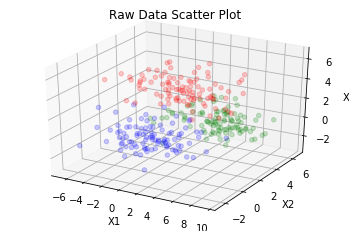

In [2]:
# Display Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.array(X[Y[:,0]==1,0]), np.array(X[Y[:,0]==1,1]), np.array(X[Y[:,0]==1,2]), c='b', alpha=0.2)
ax.scatter(np.array(X[Y[:,0]==2,0]), np.array(X[Y[:,0]==2,1]), np.array(X[Y[:,0]==2,2]), c='g', alpha=0.2)
ax.scatter(np.array(X[Y[:,0]==3,0]), np.array(X[Y[:,0]==3,1]), np.array(X[Y[:,0]==3,2]), c='r', alpha=0.2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Raw Data Scatter Plot')
#plt.show()

Text(0.5, 1.0, 'Principal Component Analysis')

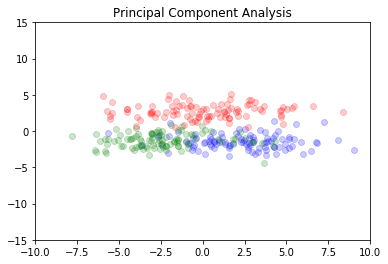

In [3]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)

plt.scatter(np.array(Xpca[Y[:,0]==1,0]), np.array(Xpca[Y[:,0]==1,1]), c='b', alpha=0.2)
plt.scatter(np.array(Xpca[Y[:,0]==2,0]), np.array(Xpca[Y[:,0]==2,1]), c='g', alpha=0.2)
plt.scatter(np.array(Xpca[Y[:,0]==3,0]), np.array(Xpca[Y[:,0]==3,1]), c='r', alpha=0.2)
plt.axis([-10, 10, -15, 15])
plt.title('Principal Component Analysis')
#plt.show()

Text(0.5, 1.0, 'Linear Discriminant Analysis')

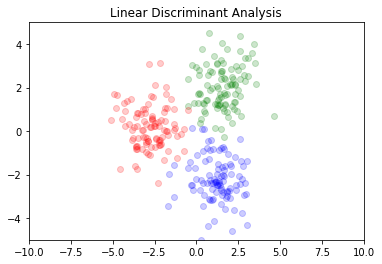

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, np.ravel(Y))
Xlda = lda.transform(X)

plt.scatter(np.array(Xlda[Y[:,0]==1,0]), np.array(Xlda[Y[:,0]==1,1]), c='b', alpha=0.2)
plt.scatter(np.array(Xlda[Y[:,0]==2,0]), np.array(Xlda[Y[:,0]==2,1]), c='g', alpha=0.2)
plt.scatter(np.array(Xlda[Y[:,0]==3,0]), np.array(Xlda[Y[:,0]==3,1]), c='r', alpha=0.2)
plt.axis([-10, 10, -5, 5])
plt.title('Linear Discriminant Analysis')
#plt.show()